In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier, AdaBoostClassifier


In [5]:
# Read the CSV file into a DataFrame
# df = pd.read_csv('../data/raw/Base.csv')
df = pd.read_csv('../data/processed/undersampled_data.csv')


In [6]:
# Identify columns with string values
string_columns = df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical variables
label_encoder = LabelEncoder()
for col in string_columns:
    df[col] = label_encoder.fit_transform(df[col])
    print(col)

# Separate fraud and non-fraud data
fraud_data = df[df['fraud_bool'] == 1]
non_fraud_data = df[df['fraud_bool'] == 0]

# # Undersample non-fraud data to match the size of the fraud data
# undersampled_non_fraud_data = resample(non_fraud_data, replace=False, n_samples=len(fraud_data), random_state=42)

# # Combine fraud and undersampled non-fraud data
# combined_data = pd.concat([fraud_data, undersampled_non_fraud_data])

# Split the combined data into features (X) and target labels (y)
X = df.drop('fraud_bool', axis=1)
y = df['fraud_bool']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

bm_pred = baseline_model.predict(X_test)
bm_roc_auc = roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:,1])
fpr_bm, tpr_bm, thresholds_bm = roc_curve(y_test, baseline_model.predict_proba(X_test)[:,1])

# Evaluate the performance of the baseline_mode
accuracy = accuracy_score(y_test, bm_pred)
report = classification_report(y_test, bm_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


payment_type
employment_status
housing_status
source
device_os
Accuracy: 0.8398514476277096
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     11018
           1       0.59      0.10      0.17      2176

    accuracy                           0.84     13194
   macro avg       0.72      0.54      0.54     13194
weighted avg       0.80      0.84      0.79     13194



/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)


In [9]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_rfe, y_train)
dt_pred = dt_model.predict(X_test_rfe)
dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test_rfe)[:,1])
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_model.predict_proba(X_test_rfe)[:,1])


In [10]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)
gb_roc_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test_scaled)[:,1])
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, gb_model.predict_proba(X_test_scaled)[:,1])


In [11]:
# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:,1])
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_model.predict_proba(X_test_scaled)[:,1])


In [12]:
# LightGBM
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_scaled, y_train)
lgbm_pred = lgbm_model.predict(X_test_scaled)
lgbm_roc_auc = roc_auc_score(y_test, lgbm_model.predict_proba(X_test_scaled)[:,1])
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, lgbm_model.predict_proba(X_test_scaled)[:,1])


[LightGBM] [Info] Number of positive: 8819, number of negative: 43957
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3222
[LightGBM] [Info] Number of data points in the train set: 52776, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167102 -> initscore=-1.606303
[LightGBM] [Info] Start training from score -1.606303


In [13]:
# CatBoost
catboost_model = CatBoostClassifier(random_state=42)
catboost_model.fit(X_train_scaled, y_train)
catboost_pred = catboost_model.predict(X_test_scaled)
catboost_roc_auc = roc_auc_score(y_test, catboost_model.predict_proba(X_test_scaled)[:,1])
fpr_catboost, tpr_catboost, thresholds_catboost = roc_curve(y_test, catboost_model.predict_proba(X_test_scaled)[:,1])


Learning rate set to 0.056029
0:	learn: 0.6435950	total: 62.5ms	remaining: 1m 2s
1:	learn: 0.5997575	total: 70.4ms	remaining: 35.1s
2:	learn: 0.5619127	total: 78.2ms	remaining: 26s
3:	learn: 0.5319323	total: 85.9ms	remaining: 21.4s
4:	learn: 0.5045790	total: 97ms	remaining: 19.3s
5:	learn: 0.4816363	total: 107ms	remaining: 17.8s
6:	learn: 0.4608044	total: 115ms	remaining: 16.3s
7:	learn: 0.4437652	total: 123ms	remaining: 15.3s
8:	learn: 0.4277904	total: 131ms	remaining: 14.4s
9:	learn: 0.4148090	total: 139ms	remaining: 13.8s
10:	learn: 0.4031421	total: 146ms	remaining: 13.1s
11:	learn: 0.3936384	total: 154ms	remaining: 12.7s
12:	learn: 0.3850974	total: 161ms	remaining: 12.2s
13:	learn: 0.3762235	total: 168ms	remaining: 11.8s
14:	learn: 0.3695693	total: 177ms	remaining: 11.6s
15:	learn: 0.3628516	total: 188ms	remaining: 11.6s
16:	learn: 0.3569052	total: 200ms	remaining: 11.5s
17:	learn: 0.3522589	total: 212ms	remaining: 11.6s
18:	learn: 0.3477939	total: 223ms	remaining: 11.5s
19:	learn:

In [14]:
# HistGradientBoostingClassifier
hist_gb_model = HistGradientBoostingClassifier(random_state=42)
hist_gb_model.fit(X_train_scaled, y_train)
hist_gb_pred = hist_gb_model.predict(X_test_scaled)
hist_gb_roc_auc = roc_auc_score(y_test, hist_gb_model.predict_proba(X_test_scaled)[:,1])
fpr_hist_gb, tpr_hist_gb, thresholds_hist_gb = roc_curve(y_test, hist_gb_model.predict_proba(X_test_scaled)[:,1])


In [15]:
# GBDTRegressor
gbdt_regressor = GradientBoostingRegressor(random_state=42)
gbdt_regressor.fit(X_train_scaled, y_train)
gbdt_pred = gbdt_regressor.predict(X_test_scaled)


In [16]:
# AdaBoostClassifier
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train_scaled, y_train)
adaboost_pred = adaboost_model.predict(X_test_scaled)
adaboost_roc_auc = roc_auc_score(y_test, adaboost_model.predict_proba(X_test_scaled)[:,1])
fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(y_test, adaboost_model.predict_proba(X_test_scaled)[:,1])

/usr/local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [17]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_rfe, y_train)
rf_pred = rf_model.predict(X_test_rfe)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_rfe)[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test_rfe)[:,1])


In [18]:
# Grid Search with Random Forest
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
rf_grid.fit(X_train_rfe, y_train)
rf_grid_pred = rf_grid.predict(X_test_rfe)
rf_grid_roc_auc = roc_auc_score(y_test, rf_grid.predict_proba(X_test_rfe)[:,1])
fpr_rf_grid, tpr_rf_grid, thresholds_rf_grid = roc_curve(y_test, rf_grid.predict_proba(X_test_rfe)[:,1])


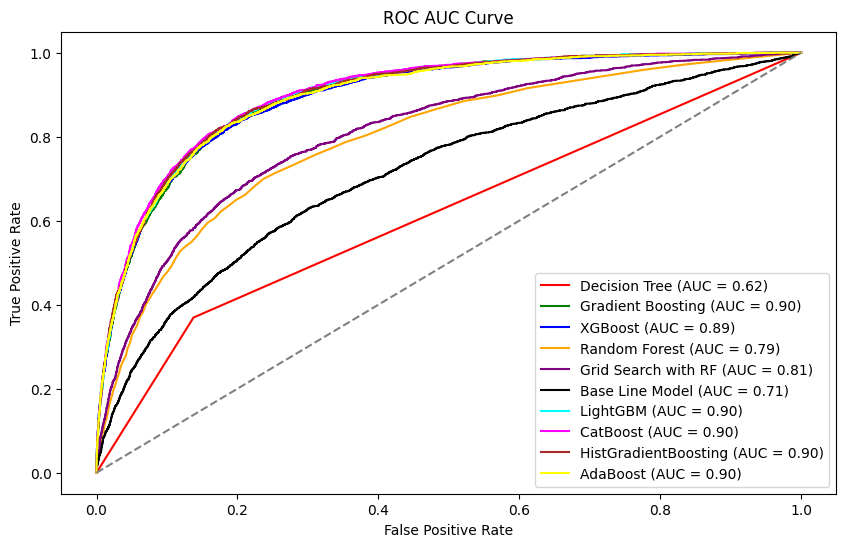

In [19]:
# Plot ROC AUC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {dt_roc_auc:.2f})', color='red')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {gb_roc_auc:.2f})', color='green')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {xgb_roc_auc:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_roc_auc:.2f})', color='orange')
plt.plot(fpr_rf_grid, tpr_rf_grid, label=f'Grid Search with RF (AUC = {rf_grid_roc_auc:.2f})', color='purple')
plt.plot(fpr_bm, tpr_bm, label=f'Base Line Model (AUC = {bm_roc_auc:.2f})', color='black')
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM (AUC = {lgbm_roc_auc:.2f})', color='cyan')
plt.plot(fpr_catboost, tpr_catboost, label=f'CatBoost (AUC = {catboost_roc_auc:.2f})', color='magenta')
plt.plot(fpr_hist_gb, tpr_hist_gb, label=f'HistGradientBoosting (AUC = {hist_gb_roc_auc:.2f})', color='brown')
plt.plot(fpr_adaboost, tpr_adaboost, label=f'AdaBoost (AUC = {adaboost_roc_auc:.2f})', color='yellow')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()
